Также распростренный класс моделей машинного обучения - линейные модели. В качестве примера - Ridge

In [21]:
from sklearn.linear_model import  Ridge
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import optuna

In [12]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [13]:
df = pd.read_csv('../data/extract/data.csv')

In [14]:
df.head()

,Unnamed: 0,Цена соевого масла_Роттердам__root_mean_square_x,Цена сырого пальмового масла__maximum_x,Цена сырого пальмового масла__root_mean_square_x,"Цена соевого масла_Роттердам__linear_trend__attr_""pvalue""_X1",Цена соевого масла_Аргентина__standard_deviation_X1,Цена пальмового масла_Аргентина__root_mean_square_X1,Цена соевого масла_Аргентина__variance_X1,Цена соевого масла_Бразилия__standard_deviation_X1,Цена соевого масла_Бразилия__variance_X1,...,Цена соевого масла_Бразилия__length_week,Цена соевого масла_Бразилия__mean_week,Цена соевого масла_Бразилия__median_week,Цена соевого масла_Бразилия__sum_values_week,"Цена соевого масла_Аргентина__linear_trend__attr_""slope""_week","Цена соевого масла_Аргентина__linear_trend__attr_""pvalue""_week",Цена соевого масла_Аргентина__minimum_week,Цена сырого пальмового масла__median_week,date,Цена сырого пальмового масла
0,0,897.281784,1485.0,871.823491,3.068082e-52,233.296209,977.98713,54427.121024,235.145601,55293.453658,...,682.0,947.196334,878.0,645987.9,0.108246,0.040672,555.57,765.000,2011-01-17,1215.0
1,1,897.281784,1485.0,871.823491,3.068082e-52,233.296209,977.98713,54427.121024,235.145601,55293.453658,...,682.0,946.779912,873.6,645703.9,0.106434,0.043488,556.01,768.125,2011-01-18,1205.0
2,2,897.281784,1485.0,871.823491,3.068082e-52,233.296209,977.98713,54427.121024,235.145601,55293.453658,...,681.0,947.314831,874.6,645121.4,0.109991,0.038626,547.19,765.000,2011-01-19,1245.0
3,3,897.281784,1485.0,871.823491,3.068082e-52,233.296209,977.98713,54427.121024,235.145601,55293.453658,...,681.0,946.309104,875.7,644436.5,0.101916,0.053841,552.04,767.500,2011-01-20,1245.0
4,4,897.281784,1485.0,871.823491,3.068082e-52,233.296209,977.98713,54427.121024,235.145601,55293.453658,...,681.0,946.632159,873.7,644656.5,0.107420,0.042281,561.74,767.500,2011-01-21,1255.0


In [15]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [16]:
X = df.drop(['Цена сырого пальмового масла', 'date'], axis=1)
y = df['Цена сырого пальмового масла']

In [18]:
def objective(trial):
    param = {
        'alpha': trial.suggest_float('alpha', 0.1, 10.0),  
        'random_state': 42
    }

    tscv = TimeSeriesSplit(n_splits=100)
    mape_arr = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = Ridge(**param)

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        mape_arr.append(mape(y_test, y_pred))

    return np.mean(mape_arr) + np.std(mape_arr)


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-04-16 20:59:44,679] A new study created in memory with name: no-name-9b6f41f8-7b36-451f-b1dc-3691f4e9999d
[I 2024-04-16 21:00:11,176] Trial 0 finished with value: 35.02908023884619 and parameters: {'alpha': 8.453058557144944}. Best is trial 0 with value: 35.02908023884619.
[I 2024-04-16 21:00:42,634] Trial 1 finished with value: 35.02929979589926 and parameters: {'alpha': 3.9907935740686358}. Best is trial 0 with value: 35.02908023884619.
[I 2024-04-16 21:01:04,380] Trial 2 finished with value: 35.02903519071474 and parameters: {'alpha': 9.336890126688932}. Best is trial 2 with value: 35.02903519071474.
[I 2024-04-16 21:01:34,965] Trial 3 finished with value: 35.02938747427285 and parameters: {'alpha': 2.56314342071606}. Best is trial 2 with value: 35.02903519071474.
[I 2024-04-16 21:01:52,849] Trial 4 finished with value: 35.02906007290332 and parameters: {'alpha': 8.90877068479322}. Best is trial 2 with value: 35.02903519071474.
[I 2024-04-16 21:01:54,568] Trial 5 finished wi

In [22]:
best_params = study.best_params

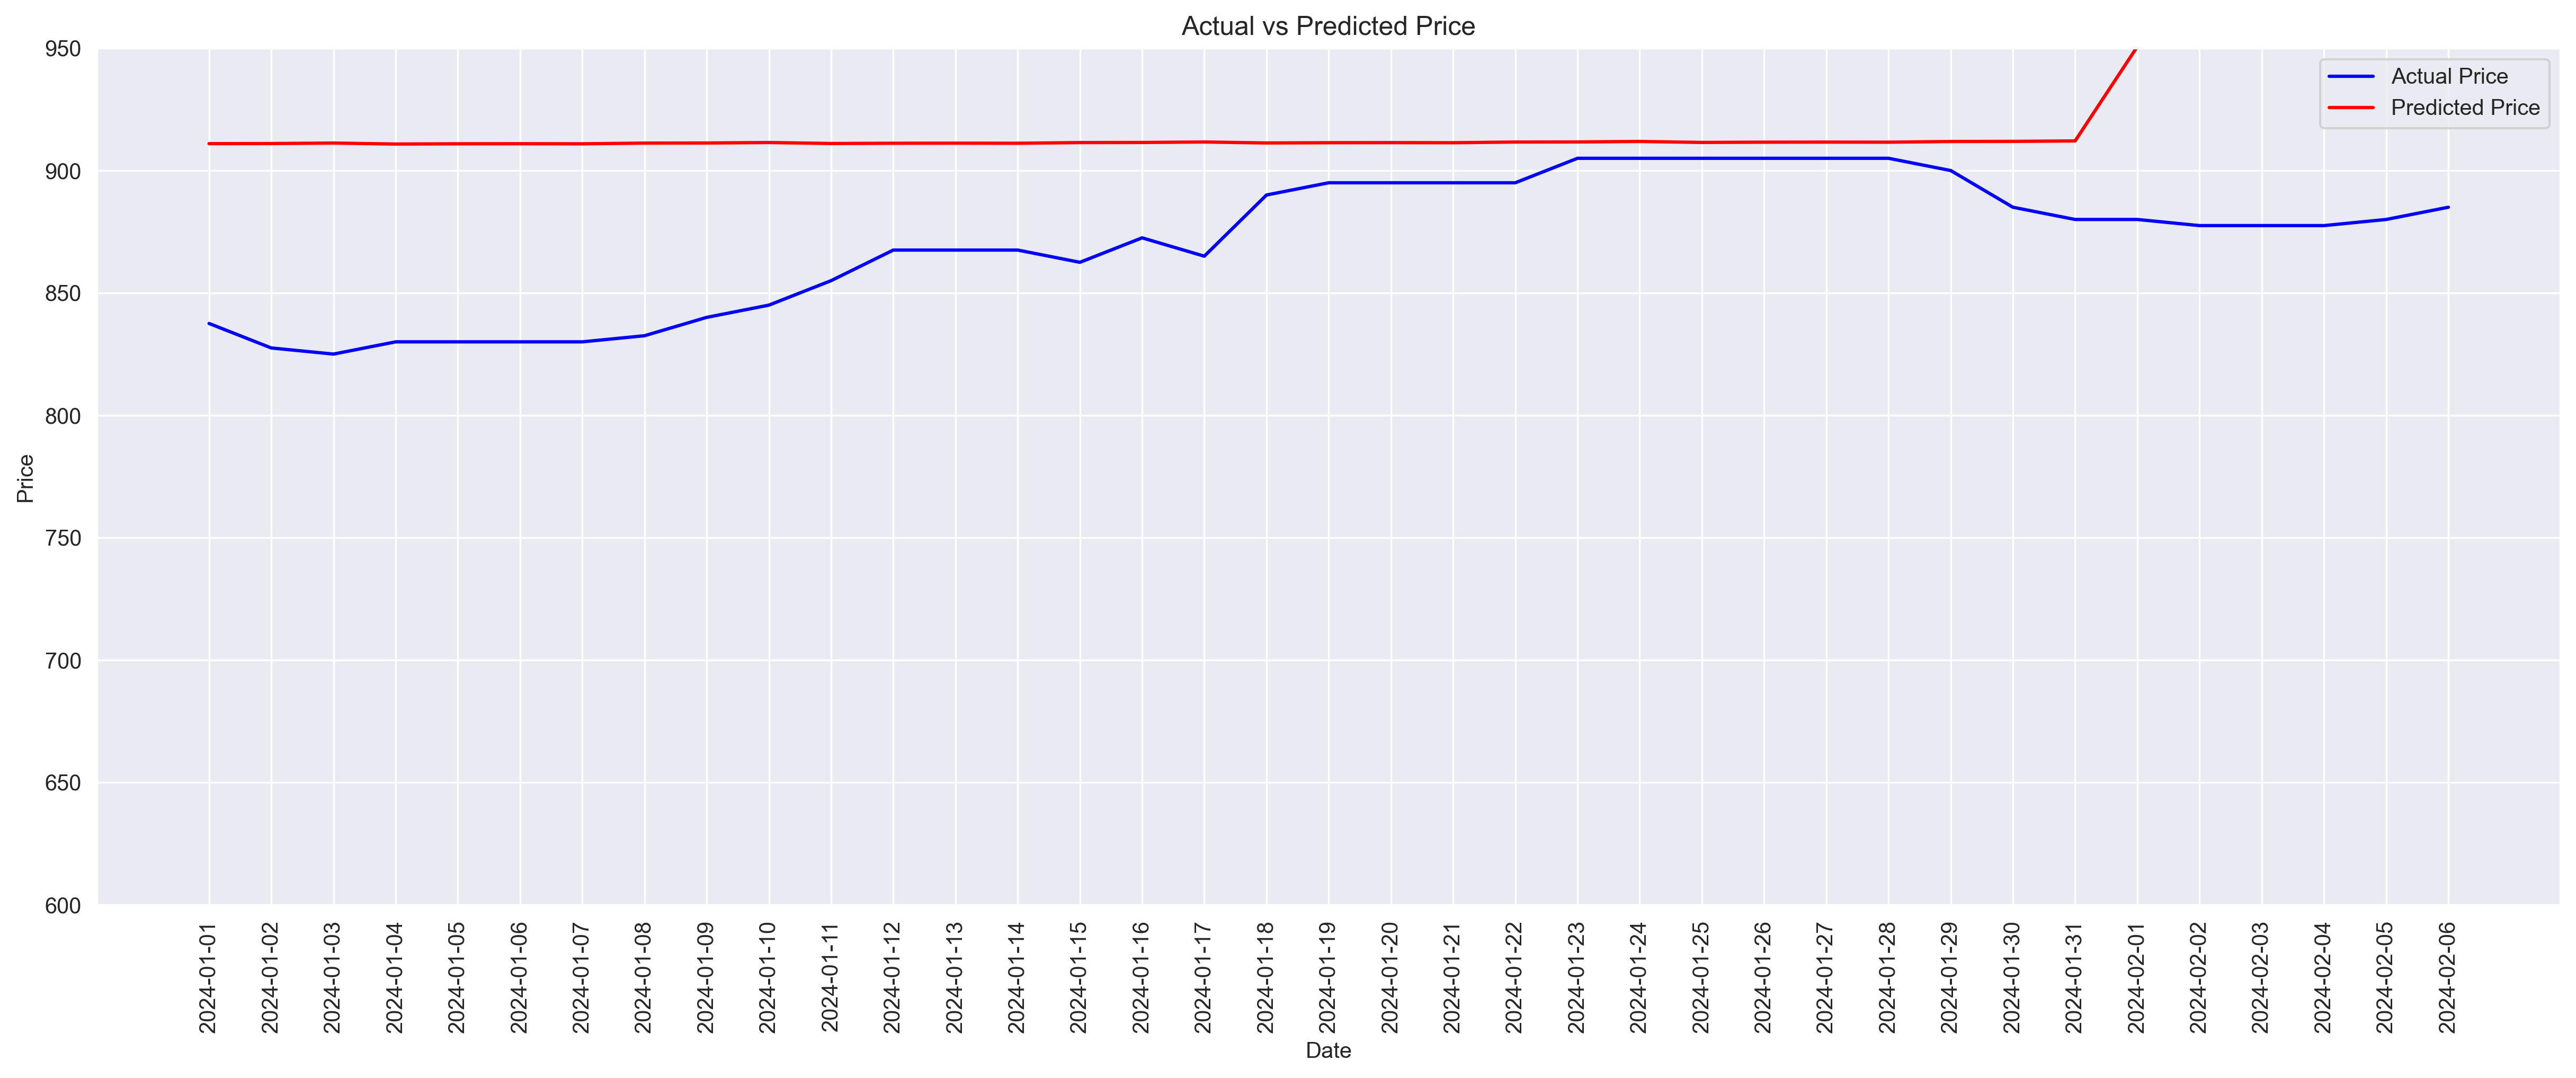

MAPE 5.460604051906723


In [23]:
best_model = Ridge(**best_params)

train = df.set_index('date').loc[:'2024-01-01']
test = df.set_index('date').loc['2024-01-01':]


X_train = train.drop('Цена сырого пальмового масла', axis=1)
y_train = train['Цена сырого пальмового масла']

X_test = test.drop('Цена сырого пальмового масла', axis=1)
y_test = test['Цена сырого пальмового масла']


best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)


plt.figure(figsize=(20, 7), dpi=300)
plt.plot(X_test.index, y_test, label='Actual Price', color='blue')
plt.plot(X_test.index, y_pred, label='Predicted Price', color='red')  # Возврат к исходной шкале
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.ylim(600, 950)
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

print("MAPE", mape(y_test, y_pred))